# HSE 2021: Mathematical Methods for Data Analysis

## Homework 5

### Contents

#### PCA, t-SNE – 4 points
* [Task 1](#task1) (1.5 points)
* [Task 2](#task2) (0.5 points)
* [Task 3](#task3) (0.5 points)
* [Task 4](#task3) (1 points)
* [Task 5](#task4) (0.5 points)

#### Clustering – 6 points
* [Task 5](#task5) (1.5 points)
* [Task 6](#task6) (1.5 points)
* [Task 7](#task7) (1.5 points)
* [Task 8](#task8) (0.5 point)
* [Task 9](#task8) (1 point)

Load the file `data_Mar_64.txt`.

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv('data_Mar_64.txt', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,Acer Campestre,0.003906,0.003906,0.027344,0.033203,0.007812,0.017578,0.023438,0.005859,0.000000,...,0.011719,0.000000,0.005859,0.035156,0.027344,0.033203,0.001953,0.000000,0.017578,0.0
1,Acer Campestre,0.005859,0.013672,0.027344,0.025391,0.013672,0.029297,0.019531,0.000000,0.001953,...,0.017578,0.000000,0.021484,0.017578,0.046875,0.005859,0.003906,0.003906,0.046875,0.0
2,Acer Campestre,0.011719,0.001953,0.027344,0.044922,0.017578,0.042969,0.023438,0.000000,0.003906,...,0.035156,0.000000,0.015625,0.021484,0.056641,0.009766,0.003906,0.000000,0.015625,0.0
3,Acer Campestre,0.013672,0.011719,0.037109,0.017578,0.011719,0.087891,0.023438,0.000000,0.000000,...,0.015625,0.001953,0.021484,0.029297,0.033203,0.003906,0.000000,0.001953,0.027344,0.0
4,Acer Campestre,0.007812,0.009766,0.027344,0.025391,0.001953,0.005859,0.015625,0.000000,0.005859,...,0.023438,0.001953,0.021484,0.048828,0.056641,0.019531,0.000000,0.000000,0.013672,0.0


This [dataset](https://archive.ics.uci.edu/ml/datasets/One-hundred+plant+species+leaves+data+set) consists of work carried out by James Cope, Charles Mallah, and James Orwell, Kingston University London. The Leaves were collected in the Royal Botanic Gardens, Kew, UK. 

For Each feature, a 64 element vector is given per sample of leaf. One file for each 64-element feature vectors. **Each row begins with the class label**. Here is the plant leaf **classification task**. The remaining 64 elements is the feature vector.

In [33]:
#Sixteen samples of leaf each of one-hundred plant species
data.shape

(1600, 65)

The first column is the target, put it in a separate variable.

In [34]:
import numpy as np
X, y_name = np.array(data.iloc[:, 1:]), data.iloc[:, 0]

**Task 1. <a id="task1"></a> (1.5 points)** Let's do the following pipeline (detailed instructions will be in next cells)

- Encode your textual target.
- Split your data into train and test. Train a simple classification model without any improvements and calculate metrics.
- Then let's look at the low dimensional representations of the features and look at the classes there. We will use linear method PCA and non-linear t-SNE (t-distributed stochastic neighbor embedding). In this task we learn how to visualize data at the low dimensional space and check whether the obtained points are separable or not.

The target variable takes a text value. Use the `LabelEncoder` from `sklearn` to encode the text variable `y_name` and save the resulting values to the variable `y`.

In [35]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y_name)
y

array([ 0,  0,  0, ..., 99, 99, 99])

Split your data into **train** and **test** in proportion 1:4.

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

Train SVM with linear kernel on your data to predict target. Calculate accuracy, F-score.

In [37]:
from sklearn.metrics import accuracy_score, f1_score

from sklearn.svm import SVC

svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_train_predict = svm_model.predict(X_train)
y_test_predict = svm_model.predict(X_test)
print('Train accuracy - ', accuracy_score(y_train, y_train_predict))
print('Test accuracy - ', accuracy_score(y_test, y_test_predict))
print('Train f-score - ', f1_score(y_train, y_train_predict, average='weighted'))
print('Test f-score - ', f1_score(y_test, y_test_predict, average='weighted'))

Train accuracy -  0.040625
Test accuracy -  0.009375
Train f-score -  0.01843106190997757
Test f-score -  0.011718749999999998


Let's try Principal Component Analysis. Use the `PCA` method from `sklearn.decomposiion` to reduce the dimension of the feature space to two. Fix `random_state=42`

In [38]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

Select objects that match values from 0 to 15 of the target variable `y`. Draw the selected objects in a two-dimensional feature space using the `scatter` method from `matplotlib.pyplot`. To display objects of different classes in different colors, pass `c = y[y<=15]` to the `scatter` method.

Text(0.5, 1.0, 'Samples from different classes in two-dimensional feature space (PCA)')

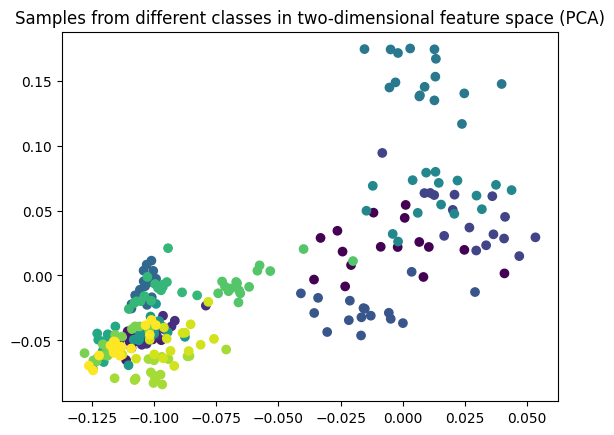

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
X_selected = X_pca[y <= 15]
plt.scatter(X_selected[:, 0], X_selected[: , 1], c=y[y <= 15])
plt.title('Samples from different classes in two-dimensional feature space (PCA)')

Do the same procedure as in two previous cells, but now for the `TSNE` method from `sklearn.manifold`.

In [40]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

Text(0.5, 1.0, 'Samples from different classes in two-dimensional feature space (TSNE)')

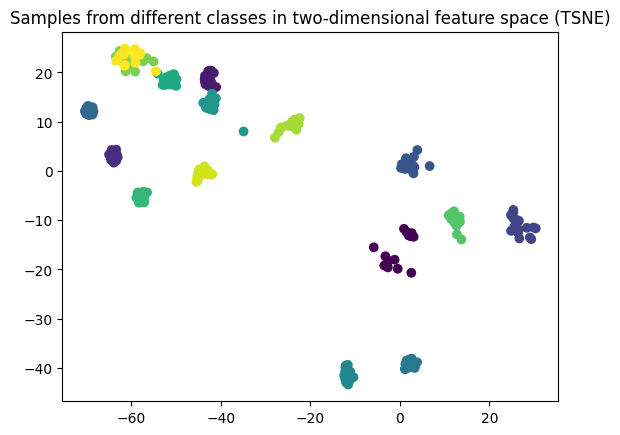

In [41]:
X_selected = X_tsne[y <= 15]
plt.scatter(X_selected[:, 0], X_selected[: , 1], c=y[y <= 15])
plt.title('Samples from different classes in two-dimensional feature space (TSNE)')

**Task 2. <a id="task2"></a> (0.5 points)** Specify the coordinates of the object with index 1 (`X[1]`) after applying the TSNE method. Round the numbers to hundredths.

In [42]:
cords_1_tsne = np.round(X_tsne[1, :], 2)
print(cords_1_tsne)

[  1.53 -12.38]


**Task 3. <a id="task3"></a> (0.5 points)** Specify the coordinates of the object with index 1 (`X[1]`) after applying the PCA method. Round the numbers to hundredths.

In [43]:
cords_1_pca = np.round(X_pca[1, :], 2)
print(cords_1_pca)

[-0.02  0.02]


**Task 4. <a id="task4"></a> (1 points)** What conclusions can be drawn from the obtained images? Choose the right one(s).

1) Using the principal components method, it was possible to visualize objects on a plane and objects of different classes are visually separable

2) Using the TSNE method, it was possible to visualize objects on a plane and objects of different classes are visually separable

3) Using the TSNE and PCA methods, it was possible to visualize objects on a plane and objects of different classes are visually separable

4) Using the TSNE and PCA methods, it was possible to visualize objects on a plane and objects of different classes are not visually separable

##your answer here ^_^
Ответ - 2, после применения TSNE на графике четко видны
очаги классов, в то время как после применения PCA по графику
непонятно, как можно провести классификацию.

**Task 5. (0.5 points)** Again try to fit your simple classifier, this time using transformed data to two-dimensional space. To do it choose the best feature representation in your opinion from two existing. Did the metrics improve?

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_tsne, y,
                                                    test_size=0.2,
                                                    random_state=42)
svm_model.fit(X_train, y_train)
y_predict = svm_model.predict(X_train)
y_test_predict = svm_model.predict(X_test)
print('Train accuracy - ', accuracy_score(y_train, y_predict))
print('Test accuracy - ', accuracy_score(y_test, y_test_predict))
print('Train f-score - ', f1_score(y_train, y_predict, average='weighted'))
print('Test f-score - ', f1_score(y_test, y_test_predict, average='weighted'))

Train accuracy -  0.7359375
Test accuracy -  0.709375
Train f-score -  0.7177146441924258
Test f-score -  0.7008408258408259


Метрики значительно улучшились

## K_means

**Task 6. <a id="task5"></a> (1.5 points)** Implement the MyKMeans class.

The class must match the template shown below. Please, add code where needed. Some guidelines are the following:

The class constructor is passed to:
- n_clusters - the number of clusters that the data will be split into

- n_iters - the maximum number of iterations that can be done in this algorithm

Realize `update_centers` and `update_labels` methods.


In the `fit` method:

- Write sequential call of `self_centers` and `self_labels`.

then in the loop by the number of iterations you need to implement:
- calculate the nearest cluster center for each object
- recalculate the center of each cluster (the average of each of the coordinates of all objects assigned to this cluster)
put the calculated new cluster centers in the `new_centers` variable

In the `predict` method:

the nearest cluster centers for `X` objects are calculated

In [45]:
from IPython.display import clear_output
from sklearn.metrics import pairwise_distances_argmin

def plot_clust(X, centers, lables, ax): 
    ax.scatter(X[:,0], X[:,1], c=lables)
    ax.scatter(centers[:,0], centers[:,1], marker='>', color='red')


class MyKMeans():
    def __init__(self, n_clusters=3, n_iters=100, seed=None):
        self.n_clusters = n_clusters
        self.labels = None 
        self.centers = None 
        self.n_iters = n_iters
        self.seed = 0 if seed is None else seed
        np.random.seed(self.seed)

    def update_centers(self, X):
        centers = []
        for center in range(self.n_clusters):
            X_center = X[self.labels == center, :]
            if len(X_center) == 0:
                centers.append(self.centers[center])
            else:
                centers.append(np.mean(X_center, axis=0))
        centers = np.array(centers)
        return centers
    
    def update_labels(self, X):
        labels = pairwise_distances_argmin(X, self.centers, axis=1)
        return labels 

    def fit(self, X):
        self.centers = np.array(X[np.random.choice(np.arange(X.shape[0]), self.n_clusters), :])
        self.labels = np.array([])
        for it in range(self.n_iters):
            new_labels = self.update_labels(X)
            self.labels = new_labels

            new_centers = self.update_centers(X)
            if np.allclose(self.centers.flatten(), new_centers.flatten(), atol=1e-1):
                self.centers = new_centers
                self.labels = new_labels
                print('Converge by tolerance centers')

                #fig, ax = plt.subplots(1,1)
                #plot_clust(X, new_centers, new_labels, ax)
                return 0
      
            self.centers = new_centers

            #fig, ax = plt.subplots(1,1)
            #plot_clust(X, new_centers, new_labels, ax)
            plt.pause(0.3)
            clear_output(wait=True)
        

        return 1
    
    def predict(self, X):
        labels = self.update_labels(X)
        return labels

Generating data for clustering

In [46]:
from sklearn import datasets
n_samples = 1000

noisy_blobs = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 0.5, 0.5],
                             random_state=0)

In [47]:
X, y = noisy_blobs

**Task 7. <a id="task6"></a> (1.5 points)** 

7.1 Cluster noisy_blobs objects with `MyKMeans`, use the hyperparameters `n_clusters=3`, `n_iters=3`. Plot result. Specify the result label for the object with index 0.

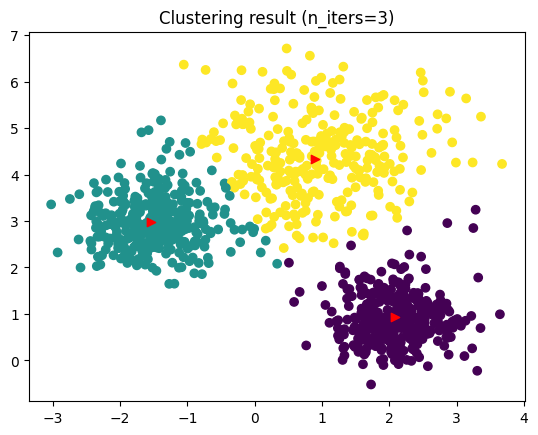

In [48]:
k_means = MyKMeans(n_clusters=3, n_iters=3)
k_means.fit(X)
fig, ax = plt.subplots(1,1)
plt.title('Clustering result (n_iters=3)')
labels_3 = k_means.predict(X)
plot_clust(X, k_means.centers, labels_3, ax)

In [49]:
print('The object with index 0 was related to {} cluster'.format(k_means.labels[0]))

The object with index 0 was related to 1 cluster


7.2 Cluster noisy_blobs objects, use the hyperparameters `n_clusters=3`, `n_iters = 100`. Plot result. Specify the result label for the object with index 0.

Converge by tolerance centers


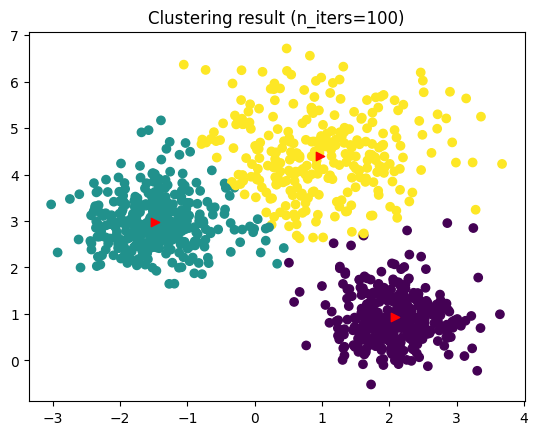

In [50]:
k_means = MyKMeans(n_clusters=3, n_iters=100)
k_means.fit(X)
fig_, ax = plt.subplots(1,1)
plt.title('Clustering result (n_iters=100)')
labels_100 = k_means.predict(X)
plot_clust(X, k_means.centers, labels_100, ax)

In [51]:
print('The object with index 0 was related to {} cluster'.format(k_means.labels[0]))

The object with index 0 was related to 1 cluster


7.3 Calculate how many objects changed the label of the predicted cluster when changing the hyperparameter n_iters from 3 to 100

In [52]:
changes = labels_100 - labels_3
changed = changes[changes != 0]
num_of_changed = len(changed)
print('Amount of changed labels is', num_of_changed)

Amount of changed labels is 8


**Task 8. <a id="task6"></a> (1.5 points)** 

Using the elbow method, select the optimal number of clusters, show it on the plot. As a metric, use the sum of the squares of the distances between the data points and the centroids of the clusters assigned to them divided by number of clusters. To do this, iterate the parameter k from 2 to 50 in steps of 2. 

In [53]:
def calculate_metric(X, y_pred, k_means, n_clusters):
    sum_of_distances = 0
    for object in range(X.shape[0]):
        distance = np.sum(np.square(X[object, :] - k_means.centers[y_pred[object]]))
        sum_of_distances += distance
    return sum_of_distances / n_clusters

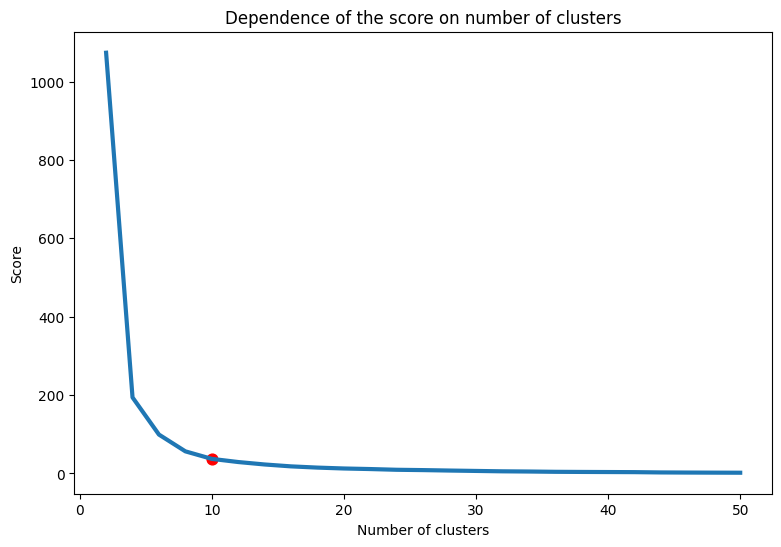

In [54]:
distance_metrics = []
number_of_clusters = []
for n_clusters in range(2, 51, 2):
    k_means_clustering = MyKMeans(n_clusters=n_clusters, n_iters=3)
    k_means_clustering.fit(X)
    y_pred = k_means_clustering.predict(X)
    distance = calculate_metric(X, y_pred, k_means_clustering, n_clusters)
    distance_metrics.append(distance)
    number_of_clusters.append(n_clusters)

plt.figure(figsize=(9, 6))
plt.plot(number_of_clusters, distance_metrics, linewidth=3)
plt.title('Dependence of the score on number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.scatter(10, distance_metrics[4], color='red', s=60, marker='o')

Оптимальное число классов - 10, так как при числе классов больше 10 зависимость
числа классов от Score становится близкой к линейной.

## DBSCAN

**Task 9. <a id="task7"></a> (0.5 points)** Cluster noisy_blobs objects using DBSCAN. Use the DBSCAN implementation from sklearn. Fix the `eps=0.3` hyperparameter. Plot result. Specify the response for the object with index 2.

In [55]:
def plot_clusters(X, y):
    if y is not None:
        for cluster_label in np.unique(y):
            plt.scatter(X[y == cluster_label, 0],
                        X[y == cluster_label, 1],
                        label=str(cluster_label))
    else:
        plt.scatter(X[:, 0], X[:, 1], label='samples')

    plt.xlabel('X1', size=12)
    plt.ylabel('X2', size=12)
    plt.xticks(size=12)
    plt.yticks(size=12)
    plt.show()

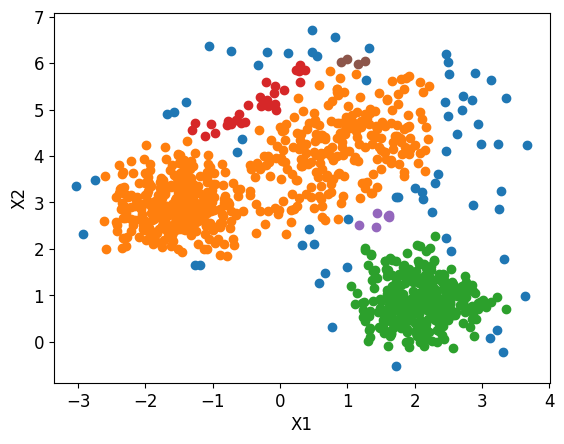

In [56]:
from sklearn import cluster
clusterer = cluster.DBSCAN(eps=0.3)
y_pred = clusterer.fit_predict(X)
plot_clusters(X, y_pred)

In [57]:
print('Object with index 2 was related to {} cluster'.format(y_pred[2]))

Object with index 2 was related to 0 cluster


**Task 10. <a id="task8"></a> (1 point)** 

Try different settings of ```eps``` distances (from 0.1 to 0.5) and several values of your choice of ```min_samples```. For each setting plot results. Also output the number of clusters and outliers (objects marked as -1).

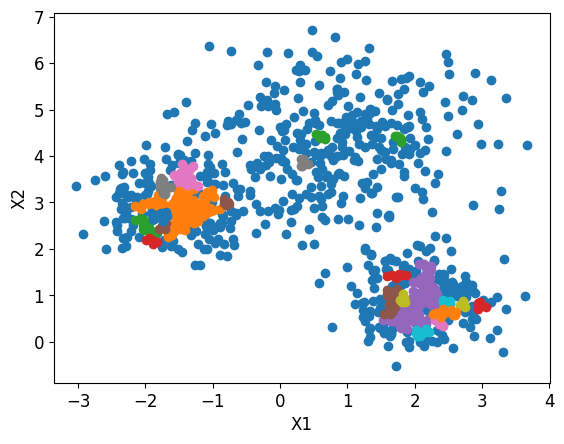

Number of clusters  25
Number of outliers  567


In [58]:
clusterer = cluster.DBSCAN(eps=0.1, min_samples=5)
y_pred = clusterer.fit_predict(X)
plot_clusters(X, y_pred)
print('Number of clusters ', len(np.unique(y_pred)) - 1)
print('Number of outliers ', len(y_pred[y_pred == -1]))

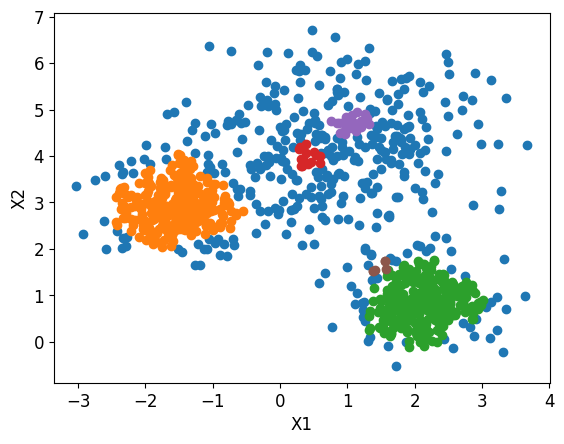

Number of clusters  5
Number of outliers  387


In [59]:
clusterer = cluster.DBSCAN(eps=0.2, min_samples=10)
y_pred = clusterer.fit_predict(X)
plot_clusters(X, y_pred)
print('Number of clusters ', len(np.unique(y_pred)) - 1)
print('Number of outliers ', len(y_pred[y_pred == -1]))

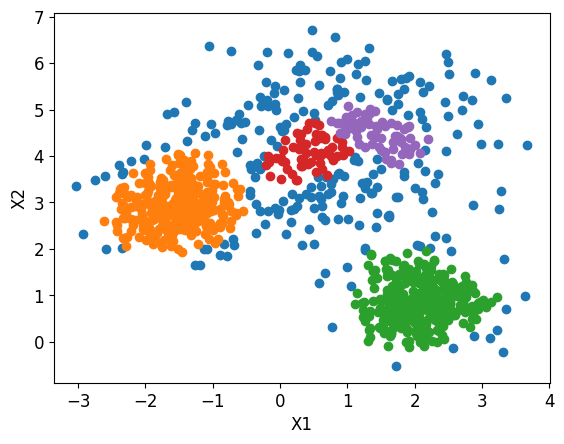

Number of clusters  4
Number of outliers  241


In [60]:
clusterer = cluster.DBSCAN(eps=0.3, min_samples=15)
y_pred = clusterer.fit_predict(X)
plot_clusters(X, y_pred)
print('Number of clusters ', len(np.unique(y_pred)) - 1)
print('Number of outliers ', len(y_pred[y_pred == -1]))

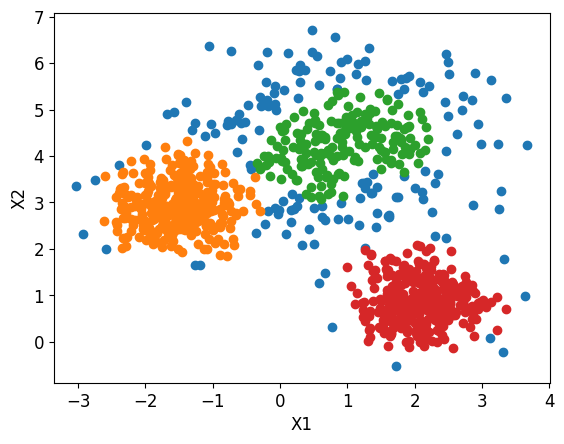

Number of clusters  3
Number of outliers  157


In [61]:
clusterer = cluster.DBSCAN(eps=0.4, min_samples=20)
y_pred = clusterer.fit_predict(X)
plot_clusters(X, y_pred)
print('Number of clusters ', len(np.unique(y_pred)) - 1)
print('Number of outliers ', len(y_pred[y_pred == -1]))

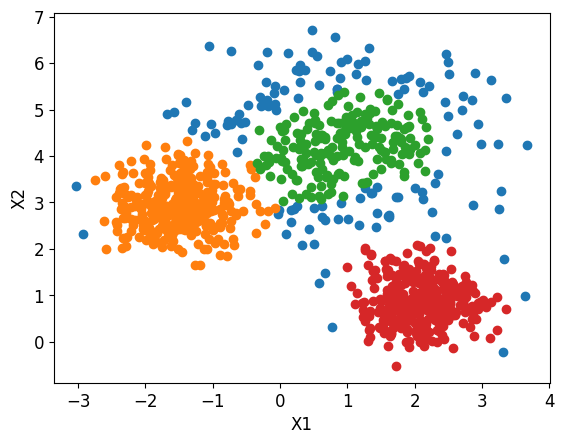

Number of clusters  3
Number of outliers  133


In [62]:
clusterer = cluster.DBSCAN(eps=0.5, min_samples=30)
y_pred = clusterer.fit_predict(X)
plot_clusters(X, y_pred)
print('Number of clusters ', len(np.unique(y_pred)) - 1)
print('Number of outliers ', len(y_pred[y_pred == -1]))